<a href="https://colab.research.google.com/github/kiran2424/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium 
cost), 2(high cost) and 3(very high cost).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mobile Price Range Prediction - Kiran Mamtani/data_mobile_price_range.csv')

In [4]:
data.shape

(2000, 21)

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [9]:
data['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

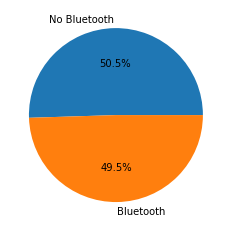

In [10]:
bluetooth = data['blue'].value_counts()
plt.pie(bluetooth,labels=['No Bluetooth','Bluetooth'],autopct='%1.1f%%')
plt.show()

In [11]:
data['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

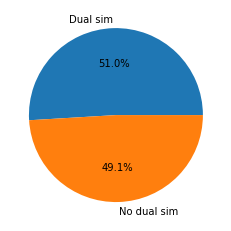

In [12]:
dual_sim = data['dual_sim'].value_counts()
plt.pie(dual_sim,labels=['Dual sim','No dual sim'],autopct='%1.1f%%')
plt.show()

In [13]:
data['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

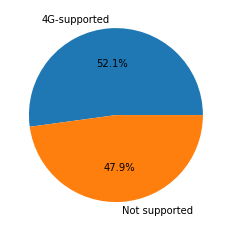

In [14]:
four_G = data['four_g'].value_counts()
plt.pie(four_G,labels=['4G-supported','Not supported'],autopct='%1.1f%%')
plt.show()

In [15]:
data['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

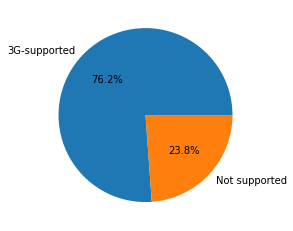

In [16]:
three_g = data['three_g'].value_counts()
plt.pie(three_g,labels=['3G-supported','Not supported'],autopct='%1.1f%%')
plt.show()

In [17]:
data['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

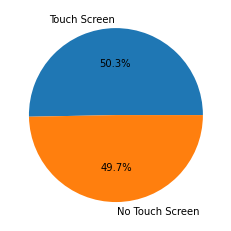

In [18]:
touch_screen = data['touch_screen'].value_counts()
plt.pie(touch_screen,labels=['Touch Screen','No Touch Screen'],autopct='%1.1f%%')
plt.show()

In [19]:
data['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

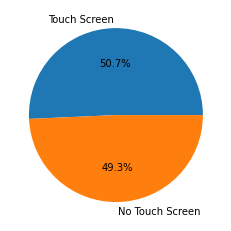

In [20]:
wifi = data['wifi'].value_counts()
plt.pie(wifi,labels=['Touch Screen','No Touch Screen'],autopct='%1.1f%%')
plt.show()

In [21]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

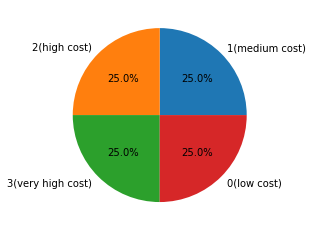

In [22]:
price_range = data['price_range'].value_counts()
plt.pie(price_range,labels=["1(medium cost)", "2(high cost)", "3(very high cost)","0(low cost)"],autopct='%1.1f%%')
plt.show()

In [23]:
remaining_columns = data.loc[:,~data.columns.isin(['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range'])]

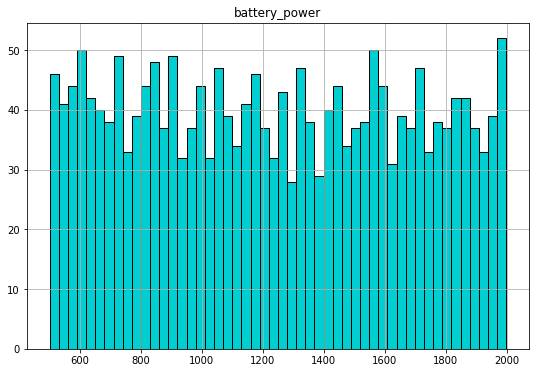

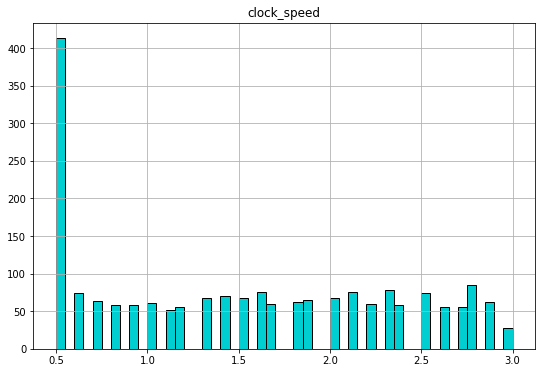

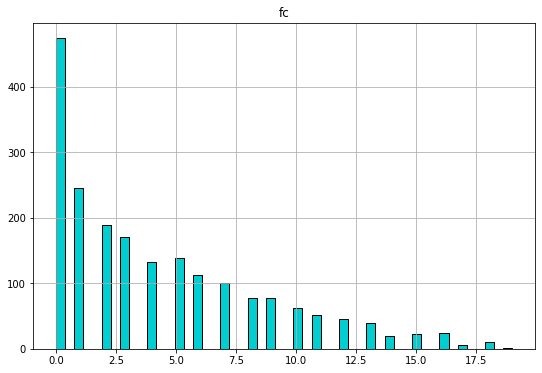

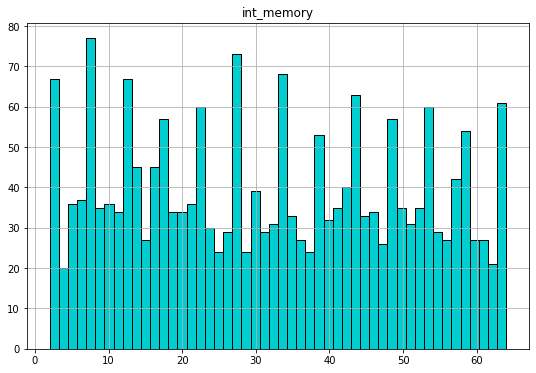

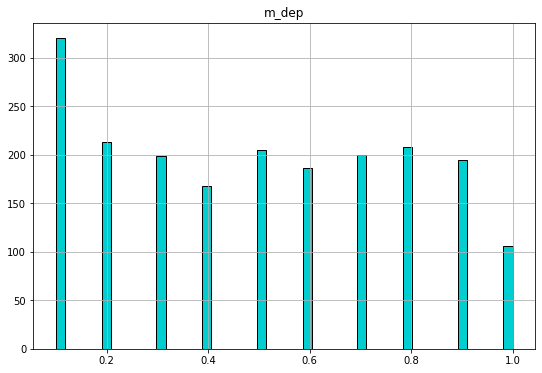

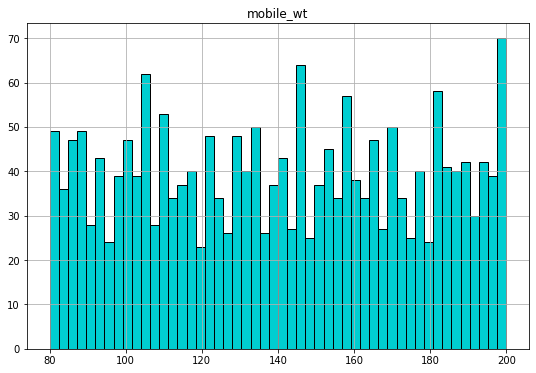

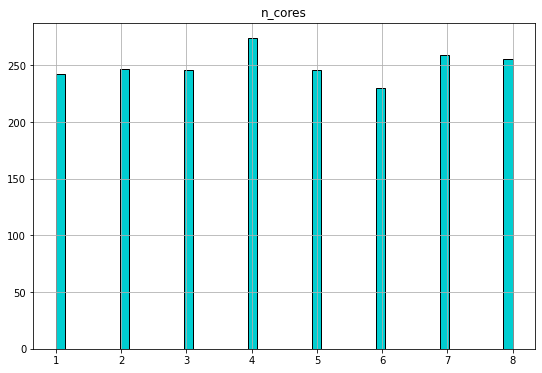

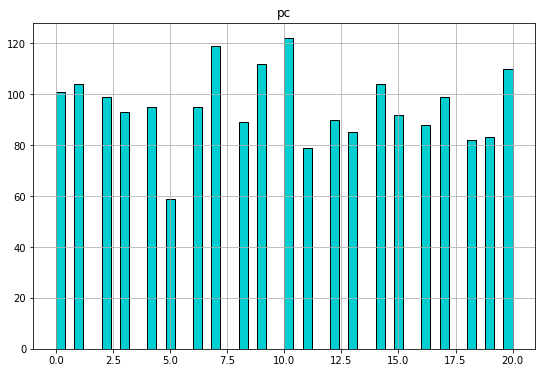

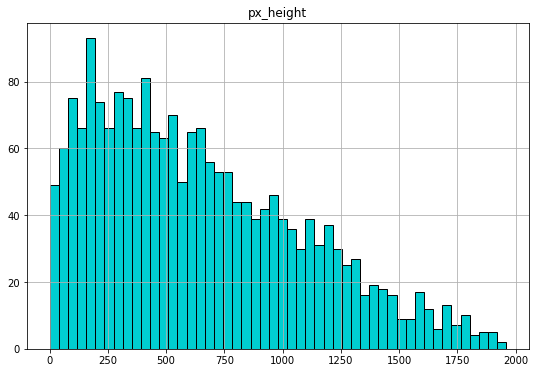

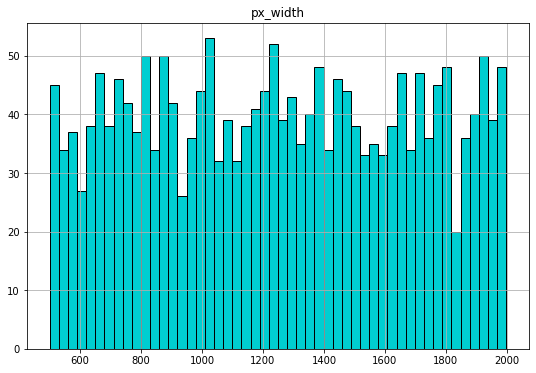

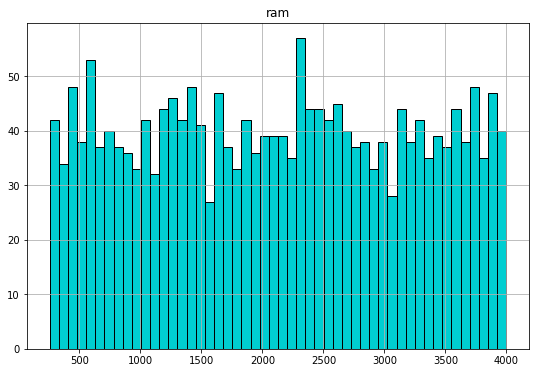

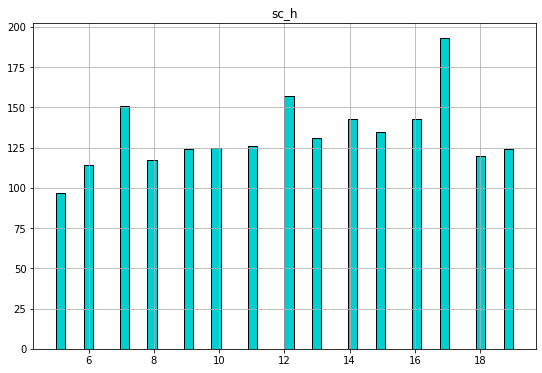

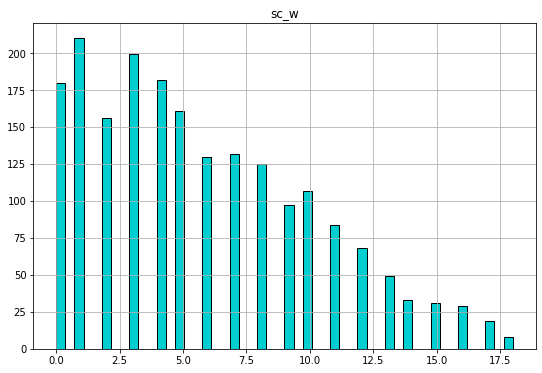

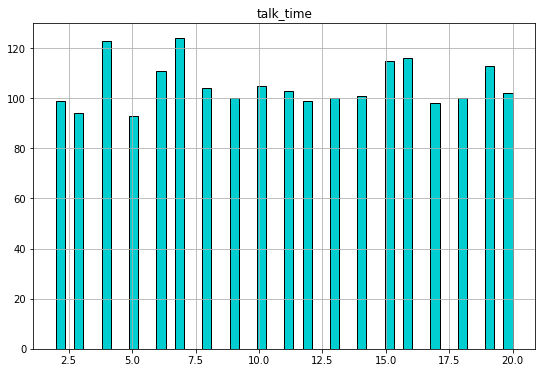

In [24]:
for col in remaining_columns[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax, color = 'darkturquoise',edgecolor = "black")    
    ax.set_title(col)
plt.show()